In [1]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Adjust the path as needed
file_path = r"C:\Users\nawas\Desktop\project 4\Copper_Set.xlsx"

# Read the Excel file
df = pd.read_excel(file_path)

# Display the dataframe
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [3]:
# to know thw unique values
unique_counts = df.nunique()
print(unique_counts)

id               181671
item_date           252
quantity tons    181673
customer           1169
country              17
status                9
item type             7
application          30
thickness           594
width              1386
material_ref      16563
product_ref          33
delivery date        28
selling_price      9795
dtype: int64


In [4]:
df.shape

(181673, 14)

In [5]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [6]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [8]:
# Data Understanding dealing with data in wrong format for categorical variables

df['item_date'] =pd.to_datetime(df['item_date'],format ='%Y%m%d', errors='coerce')
df['quantity tons'] =pd.to_numeric(df['quantity tons'], errors='coerce')
df['customer'] =pd.to_numeric(df['customer'], errors='coerce')
df['country'] =pd.to_numeric(df['country'], errors='coerce')
df['thickness'] =pd.to_numeric(df['thickness'], errors='coerce')
df['width'] =pd.to_numeric(df['width'], errors='coerce')
df['material_ref'] = df['material_ref'].str.lstrip('0')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce')
df['selling_price'] =pd.to_numeric(df['selling_price'], errors='coerce')
df['delivery_date_diff'] = (df['delivery date'] - df['item_date']).dt.days

In [9]:
df['item_date'].min()

Timestamp('2020-07-02 00:00:00')

In [10]:
df['item_date'].max()

Timestamp('2021-04-01 00:00:00')

In [11]:
df['delivery date'].min()

Timestamp('2019-04-01 00:00:00')

In [12]:
df['delivery date'].max()

Timestamp('2022-01-01 00:00:00')

In [13]:
df.sample(3)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,delivery_date_diff
110839,B263EDA2-5FB4-4EB5-9188-BD16C3B04B9E,2020-11-03,126.925617,30231860.0,27.0,To be approved,S,41.0,0.28,1140.0,NaN,611993,2021-01-01,941.0,59.0
80384,903186BA-15D1-45AE-AF92-02DCFEEDD902,2020-12-10,1.651675,30288874.0,26.0,To be approved,W,58.0,10.00,1550.0,NaN,640665,2021-04-01,703.0,112.0
24167,6EFD31AA-E188-4F1C-98D3-5FF8C0FDA7DD,2021-03-05,132.644197,30346534.0,32.0,Won,W,59.0,5.85,1419.0,HRCL_S-355-HLE-J2H 5.85X1419,640665,2021-07-01,817.0,118.0


In [14]:
df.shape

(181673, 15)

In [15]:
df.dtypes

id                            object
item_date             datetime64[ns]
quantity tons                float64
customer                     float64
country                      float64
status                        object
item type                     object
application                  float64
thickness                    float64
width                        float64
material_ref                  object
product_ref                    int64
delivery date         datetime64[ns]
selling_price                float64
delivery_date_diff           float64
dtype: object

In [16]:
# Replace values starting with '00000' with NaN
df['material_ref'] = df['material_ref'].apply(lambda x: np.nan if str(x).startswith('00000') else x)

In [17]:
df.isnull().sum()

id                        2
item_date                 3
quantity tons             1
customer                  1
country                  28
status                    2
item type                 0
application              24
thickness                 1
width                     0
material_ref          77919
product_ref               0
delivery date             3
selling_price             1
delivery_date_diff        6
dtype: int64

In [18]:
# Descriptive analysis
df.describe().T

,count,mean,min,25%,50%,75%,max,std
item_date,181670,2020-11-26 22:56:58.127374080,2020-07-02 00:00:00,2020-09-29 00:00:00,2020-11-30 00:00:00,2021-02-03 00:00:00,2021-04-01 00:00:00,NaN
quantity tons,181672.0,5874.925754,-2000.0,10.970298,30.364635,67.160612,1000000000.0,2349081.241674
customer,181672.0,30512209.027968,12458.0,30196884.0,30205242.0,30280416.0,2147483647.0,24333815.584025
country,181645.0,44.893022,25.0,26.0,30.0,78.0,113.0,24.404214
application,181649.0,25.615809,2.0,10.0,15.0,41.0,99.0,17.754175
thickness,181672.0,2.564827,0.18,0.7,1.5,3.0,2500.0,6.572321
width,181673.0,1295.286724,1.0,1180.0,1250.0,1500.0,2990.0,261.631754
product_ref,181673.0,473967910.724318,611728.0,611993.0,640665.0,1332077137.0,1722207579.0,717510064.710402
delivery date,181670,2021-01-25 22:44:26.223372032,2019-04-01 00:00:00,2020-11-01 00:00:00,2021-01-01 00:00:00,2021-04-01 00:00:00,2022-01-01 00:00:00,NaN
selling_price,181672.0,1918.035505,-1160.0,669.0,812.0,953.0,100001015.0,331795.642555


In [19]:
df['quantity tons']=df['quantity tons'].apply(lambda x: np.nan if x<=0 else x)
df['selling_price']=df['selling_price'].apply(lambda x: np.nan if x<=0 else x)
df['delivery_date_diff']=df['delivery_date_diff'].apply(lambda x: np.nan if x<=0 else x)
df.describe().T

,count,mean,min,25%,50%,75%,max,std
item_date,181670,2020-11-26 22:56:58.127374080,2020-07-02 00:00:00,2020-09-29 00:00:00,2020-11-30 00:00:00,2021-02-03 00:00:00,2021-04-01 00:00:00,NaN
quantity tons,181668.0,5875.066247,0.00001,10.971217,30.365013,67.161335,1000000000.0,2349107.102735
customer,181672.0,30512209.027968,12458.0,30196884.0,30205242.0,30280416.0,2147483647.0,24333815.584025
country,181645.0,44.893022,25.0,26.0,30.0,78.0,113.0,24.404214
application,181649.0,25.615809,2.0,10.0,15.0,41.0,99.0,17.754175
thickness,181672.0,2.564827,0.18,0.7,1.5,3.0,2500.0,6.572321
width,181673.0,1295.286724,1.0,1180.0,1250.0,1500.0,2990.0,261.631754
product_ref,181673.0,473967910.724318,611728.0,611993.0,640665.0,1332077137.0,1722207579.0,717510064.710402
delivery date,181670,2021-01-25 22:44:26.223372032,2019-04-01 00:00:00,2020-11-01 00:00:00,2021-01-01 00:00:00,2021-04-01 00:00:00,2022-01-01 00:00:00,NaN
selling_price,181665.0,1918.124252,0.1,669.0,812.0,953.0,100001015.0,331802.034663


In [20]:
# Information about the data non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  181671 non-null  object        
 1   item_date           181670 non-null  datetime64[ns]
 2   quantity tons       181668 non-null  float64       
 3   customer            181672 non-null  float64       
 4   country             181645 non-null  float64       
 5   status              181671 non-null  object        
 6   item type           181673 non-null  object        
 7   application         181649 non-null  float64       
 8   thickness           181672 non-null  float64       
 9   width               181673 non-null  float64       
 10  material_ref        103754 non-null  object        
 11  product_ref         181673 non-null  int64         
 12  delivery date       181670 non-null  datetime64[ns]
 13  selling_price       181665 no

In [21]:
# to find the null values
df.isnull().sum()

id                        2
item_date                 3
quantity tons             5
customer                  1
country                  28
status                    2
item type                 0
application              24
thickness                 1
width                     0
material_ref          77919
product_ref               0
delivery date             3
selling_price             8
delivery_date_diff    16573
dtype: int64

In [22]:
# Filling the missing value to unknown
df['material_ref'].fillna('unknown', inplace=True)

In [23]:
# Filling the unkown values into median valye of the column
df['status'].fillna(df['status'].mode().iloc[0],inplace=True)

df['quantity tons'].fillna(df['quantity tons'].median(),inplace=True)
df['customer'].fillna(df['customer'].median(),inplace=True)
df['country'].fillna(df['country'].median(),inplace=True)
df['application'].fillna(df['application'].median(),inplace=True)
df['thickness'].fillna(df['thickness'].median(),inplace=True)
df['selling_price'].fillna(df['selling_price'].median(),inplace=True)
df['delivery_date_diff'].fillna(df['delivery_date_diff'].median(),inplace=True)

In [24]:
df['id'].fillna('unknown', inplace=True)

In [25]:
df.isnull().sum()

id                    0
item_date             3
quantity tons         0
customer              0
country               0
status                0
item type             0
application           0
thickness             0
width                 0
material_ref          0
product_ref           0
delivery date         3
selling_price         0
delivery_date_diff    0
dtype: int64

In [26]:
df=df.dropna()

In [27]:
df.shape

(181667, 15)

<Axes: >

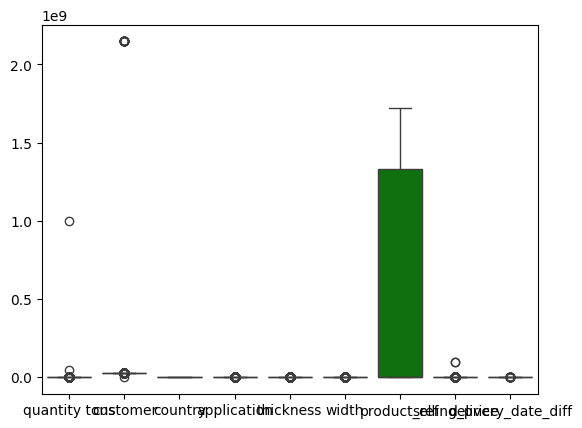

In [28]:
# boxplot to know the Outliers
sns.boxplot(data = df, color='green')

In [29]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
item_date,181667,2020-11-26 22:56:12.883352832,2020-07-02 00:00:00,2020-09-29 00:00:00,2020-11-30 00:00:00,2021-02-03 00:00:00,2021-04-01 00:00:00,NaN
quantity tons,181667.0,5875.097629,0.00001,10.971048,30.365013,67.159736,1000000000.0,2349113.568144
customer,181667.0,30512215.589904,12458.0,30196884.0,30205242.0,30280416.0,2147483647.0,24334150.416962
country,181667.0,44.890751,25.0,26.0,30.0,78.0,113.0,24.403037
application,181667.0,25.614448,2.0,10.0,15.0,41.0,99.0,17.753182
thickness,181667.0,2.564867,0.18,0.7,1.5,3.0,2500.0,6.572405
width,181667.0,1295.285308,1.0,1180.0,1250.0,1500.0,2990.0,261.63541
product_ref,181667.0,473973462.089174,611728.0,611993.0,640665.0,1332077137.0,1722207579.0,717512632.039963
delivery date,181667,2021-01-25 22:43:35.259788544,2019-04-01 00:00:00,2020-11-01 00:00:00,2021-01-01 00:00:00,2021-04-01 00:00:00,2022-01-01 00:00:00,NaN
selling_price,181667.0,1918.108117,0.1,669.0,812.0,953.0,100001015.0,331800.208249


In [30]:
df.shape

(181667, 15)

In [31]:
df.isnull().sum()

id                    0
item_date             0
quantity tons         0
customer              0
country               0
status                0
item type             0
application           0
thickness             0
width                 0
material_ref          0
product_ref           0
delivery date         0
selling_price         0
delivery_date_diff    0
dtype: int64

In [32]:
# Know about the unique values
df['status'].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [33]:
# Know about the unique values
df['item type'].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [34]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,delivery_date_diff
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,91.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,66.0
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,66.0
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,66.0
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,66.0


In [35]:
# To know about the skewness of the data

numerical_columns = ['quantity tons','customer','country','application','thickness','width','product_ref','selling_price','delivery_date_diff']

# Calculate skewness for each numerical column
skewness_values = df[numerical_columns].skew()

print("Skewness of Numerical Columns:")
print(skewness_values)

Skewness of Numerical Columns:
quantity tons         424.683803
customer               86.983871
country                 0.753836
application             0.724541
thickness             303.443426
width                   0.374606
product_ref             1.015196
selling_price         301.383111
delivery_date_diff      0.347839
dtype: float64


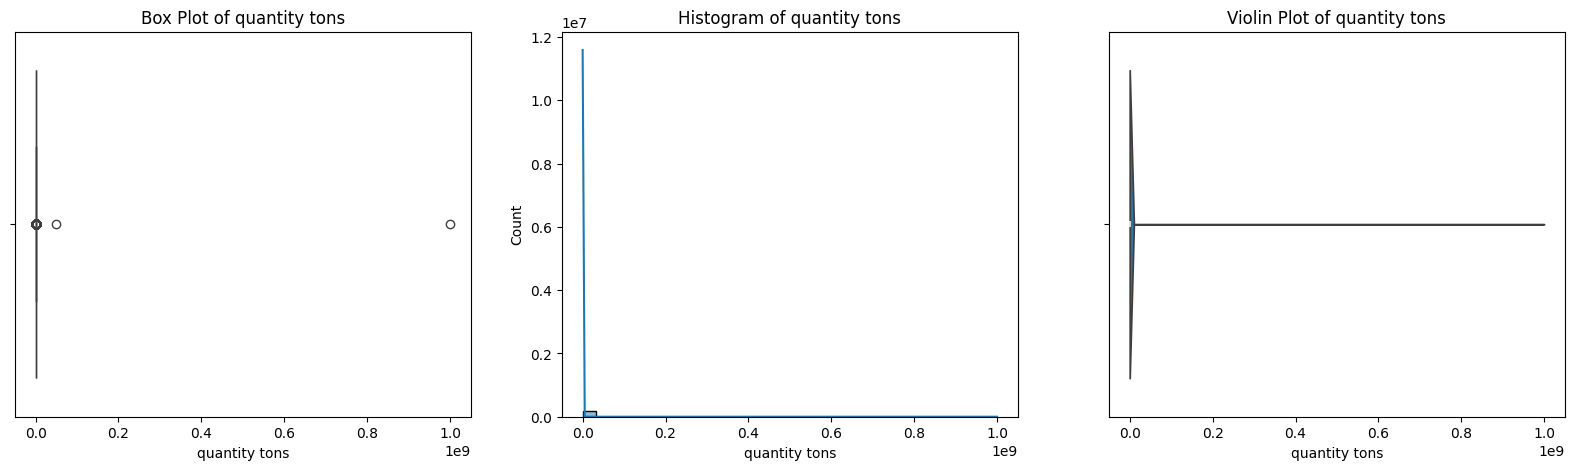

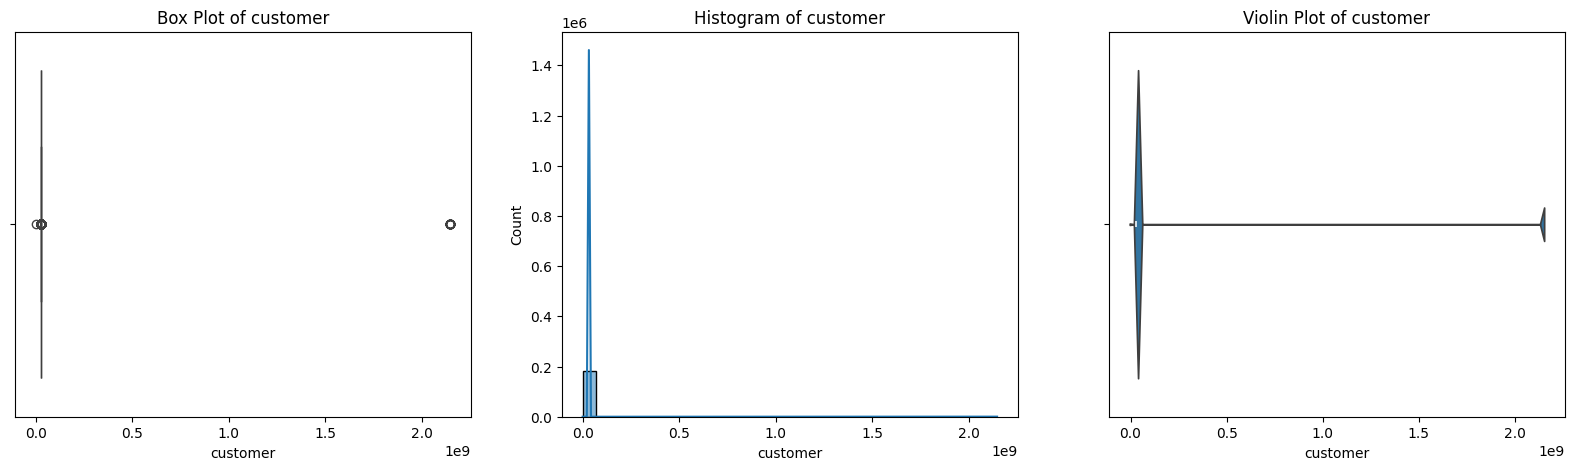

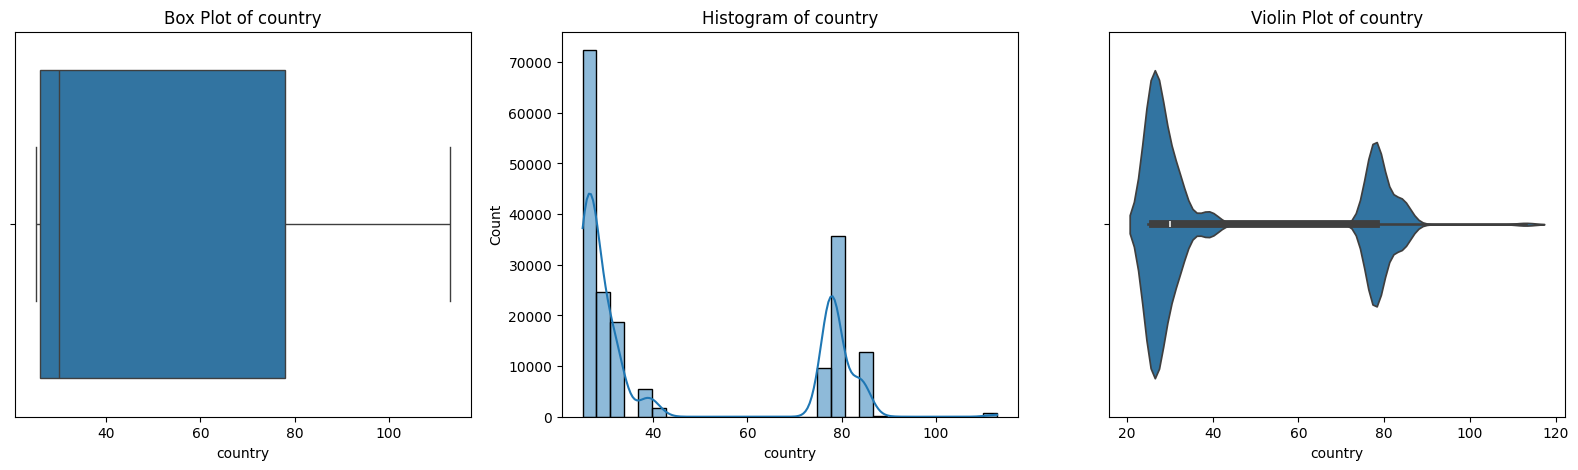

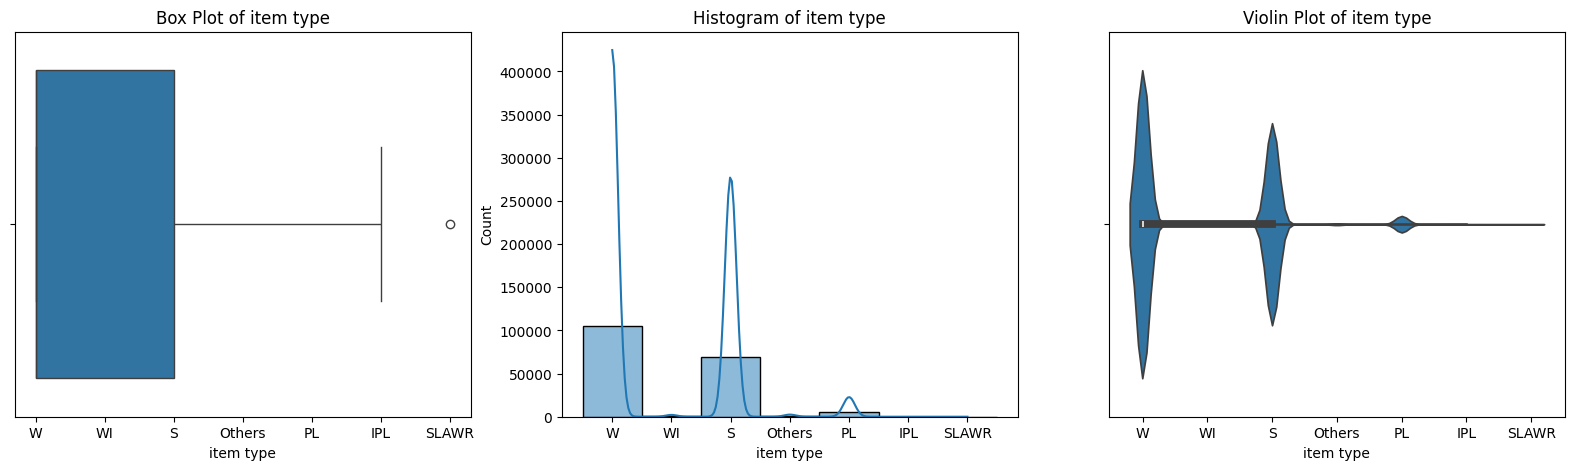

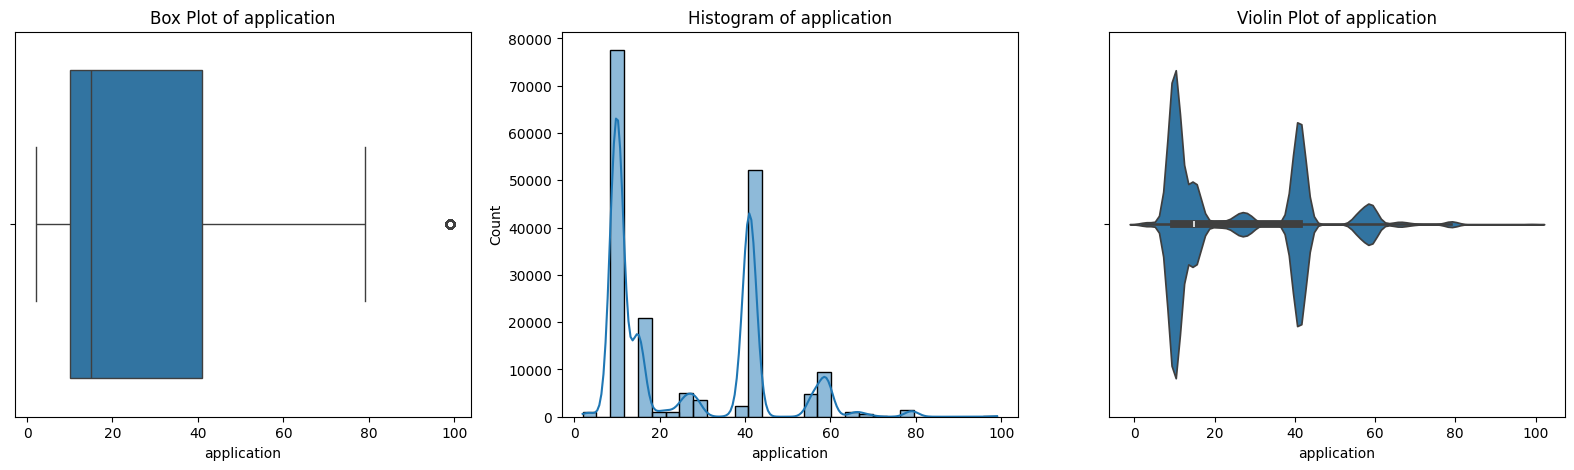

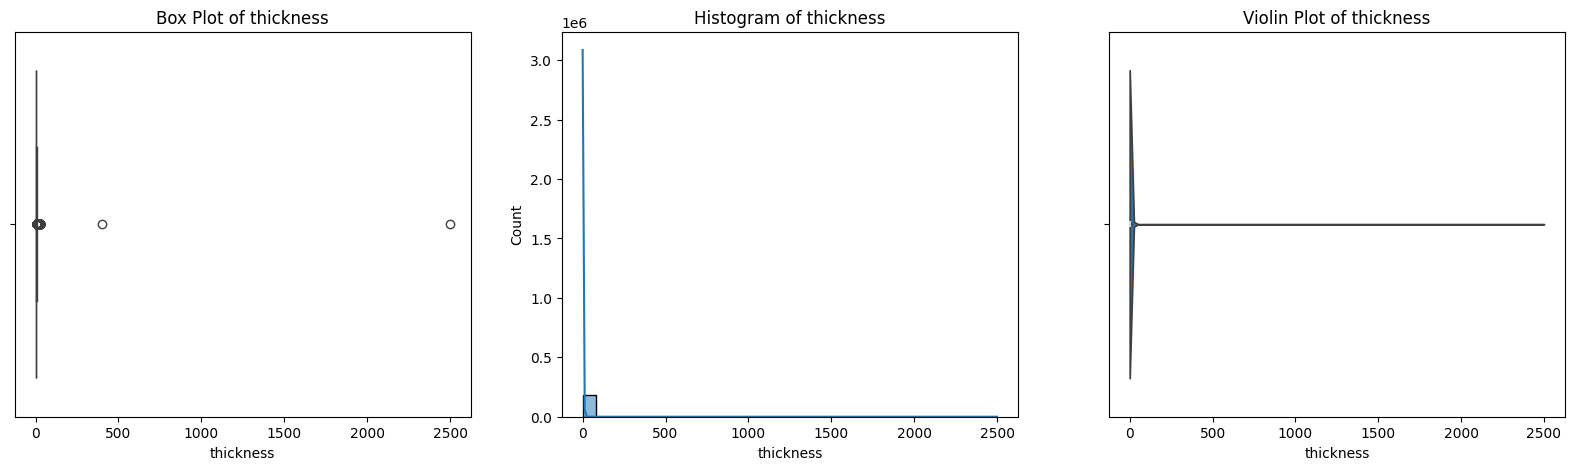

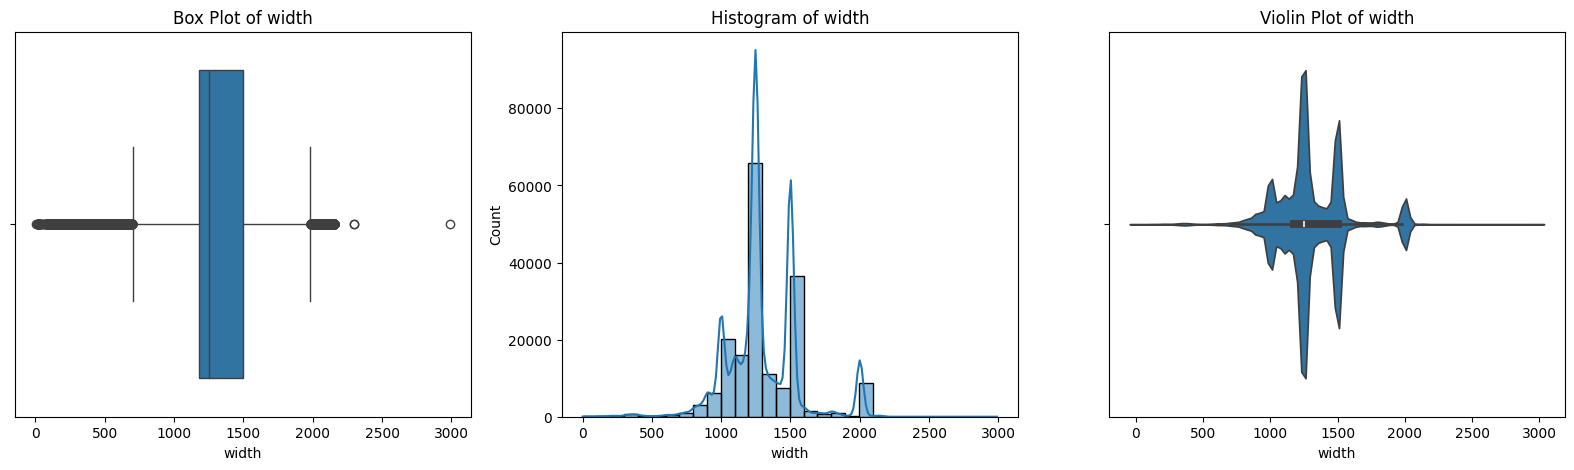

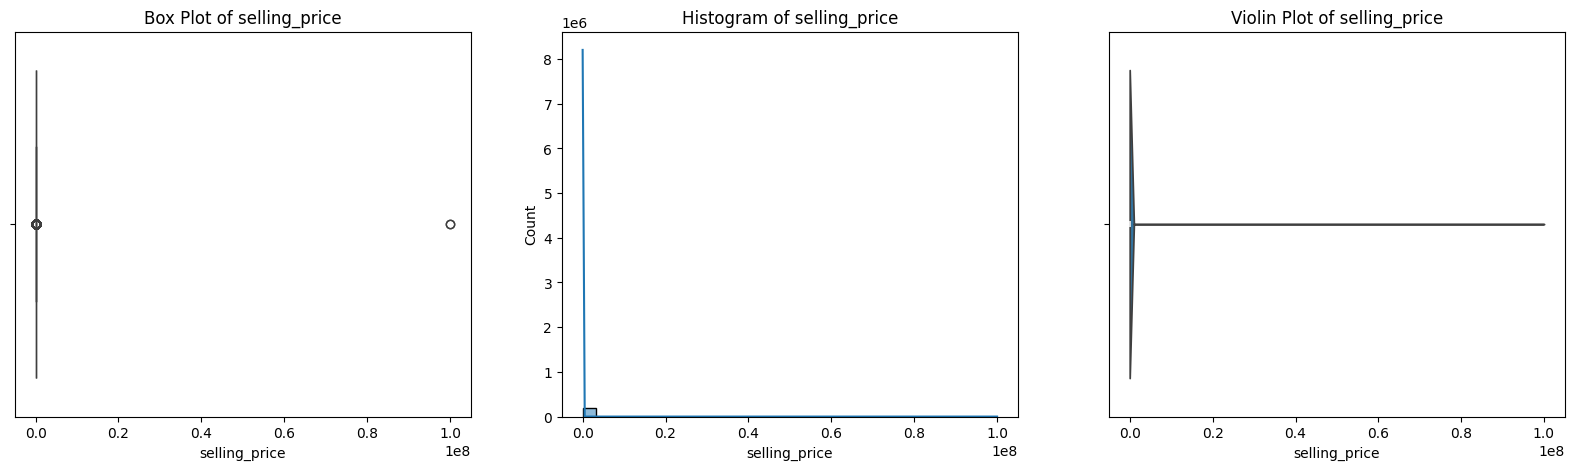

In [36]:
# find outliers - box plot & skewed data - hist plot and violin plot

# Create box plots for each numerical column
def plot(df,column):
    plt.figure(figsize=(20, 5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot of {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=df, x=column, kde=True, bins=30)
    plt.title(f'Histogram of {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df, x=column)
    plt.title(f'Violin Plot of {column}')
    plt.show()


# Box plot for all numerical columns to detect outliers
for i in ['quantity tons', 'customer', 'country', 'item type', 'application', 'thickness', 'width', 'selling_price']:
  plot(df, i)

In [37]:
# quantity tons, thickness and selling price data are skewd. so using the log transformation method to handle the skewness data
df1=df.copy()
df1['quantity tons_log'] = np.log(df1['quantity tons'])
df1['thickness_log'] = np.log(df1['thickness'])
df1['selling_price_log'] = np.log(df1['selling_price'])
df1

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,delivery_date_diff,quantity tons_log,thickness_log,selling_price_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,91.0,3.991779,0.693147,6.749931
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,66.0,6.643822,-0.223144,6.953684
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,66.0,5.956169,-0.967584,6.468211
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,66.0,5.310301,0.832909,6.643790
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,66.0,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,1000777,164141591,2020-07-01,591.00,66.0,4.629691,-0.040822,6.381816
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,1000227,164141591,2020-07-01,589.00,66.0,5.337954,-0.051293,6.378426
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,1004216,164141591,2020-07-01,619.00,66.0,1.443523,-0.342490,6.428105
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,2020-07-02,30.365013,30200854.0,25.0,Won,W,41.0,0.85,1250.0,1001149,164141591,2020-07-01,601.00,66.0,3.413291,-0.162519,6.398595


In [38]:
# Drop the below columns because change those columns into log
df1.drop(columns=['quantity tons','thickness','selling_price'], inplace = True)
df1.head()

,id,item_date,customer,country,status,item type,application,width,material_ref,product_ref,delivery date,delivery_date_diff,quantity tons_log,thickness_log,selling_price_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,30156308.0,28.0,Won,W,10.0,1500.0,DEQ1 S460MC,1670798778,2021-07-01,91.0,3.991779,0.693147,6.749931
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,30202938.0,25.0,Won,W,41.0,1210.0,104991,1668701718,2021-04-01,66.0,6.643822,-0.223144,6.953684
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,30153963.0,30.0,Won,WI,28.0,952.0,S0380700,628377,2021-01-01,66.0,5.956169,-0.967584,6.468211
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,30349574.0,32.0,Won,S,59.0,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,66.0,5.310301,0.832909,6.643790
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,30211560.0,28.0,Won,W,10.0,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,66.0,6.666354,1.386294,6.357842


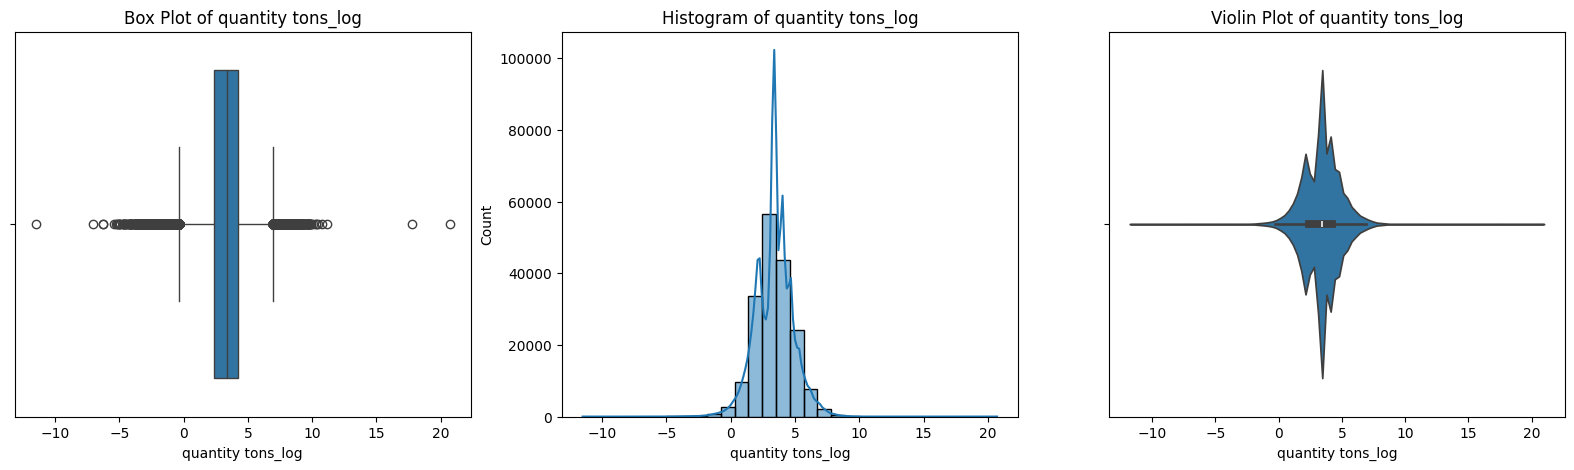

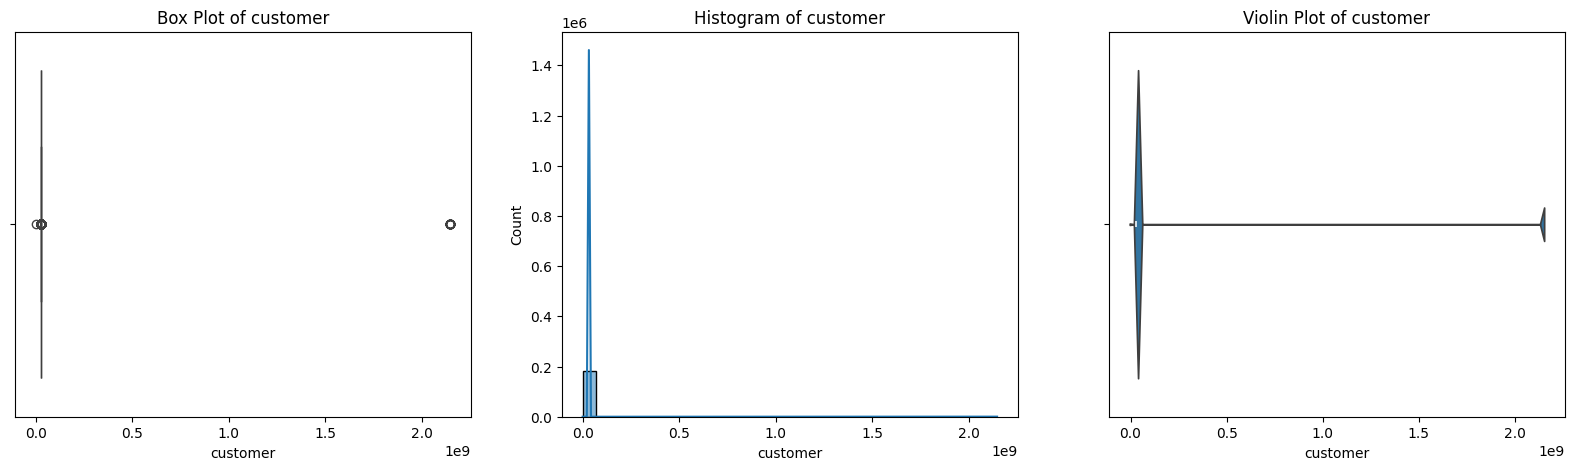

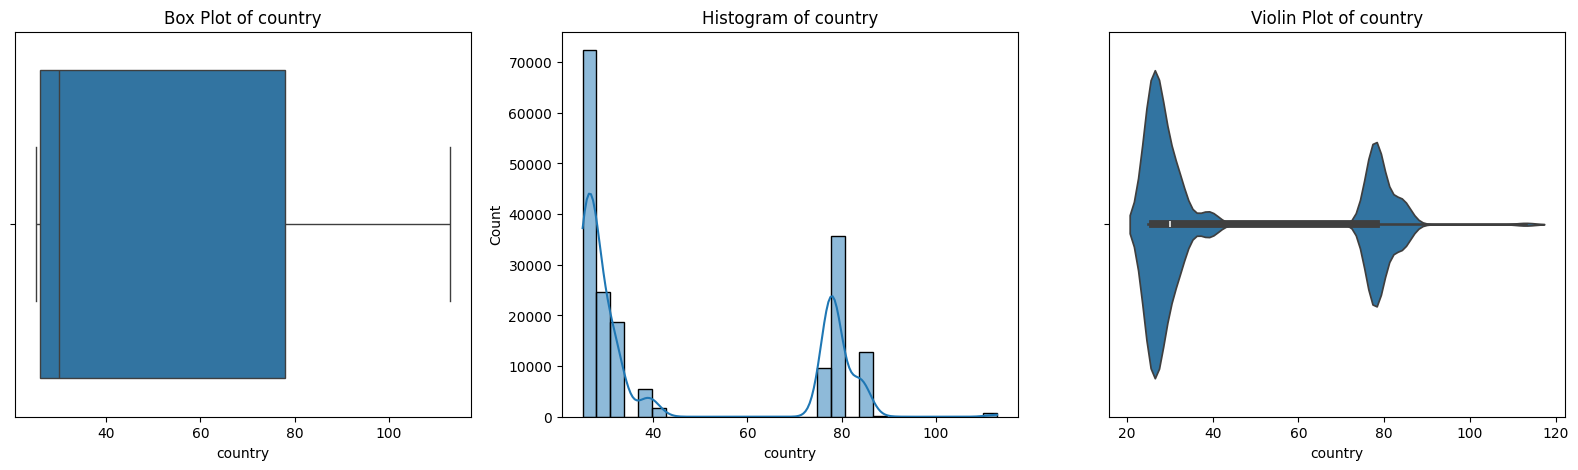

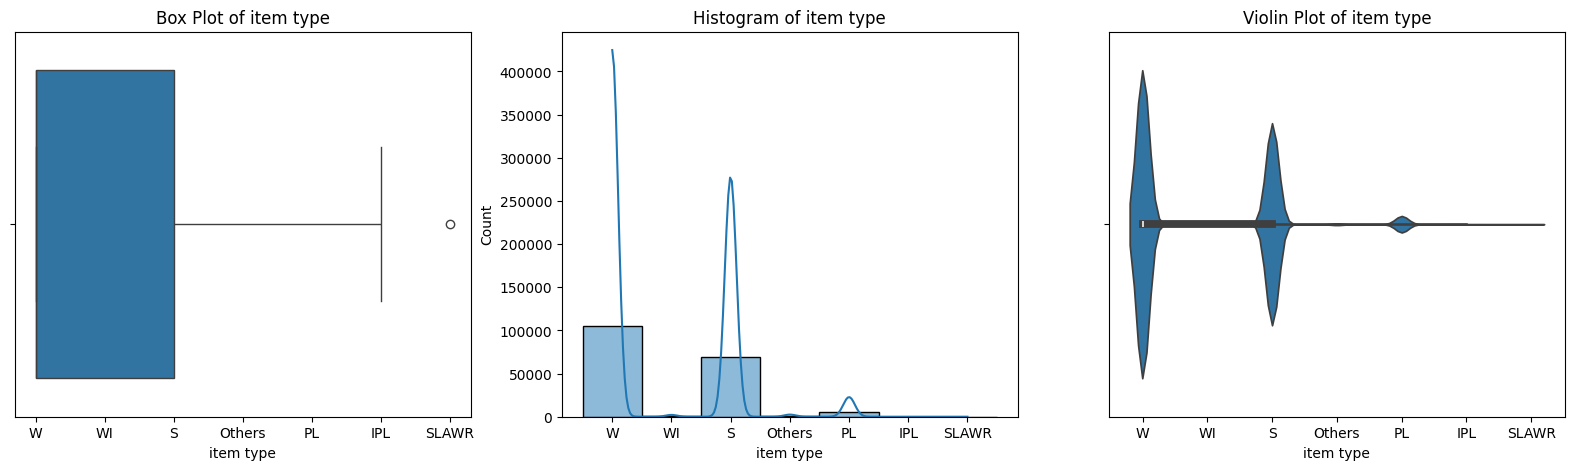

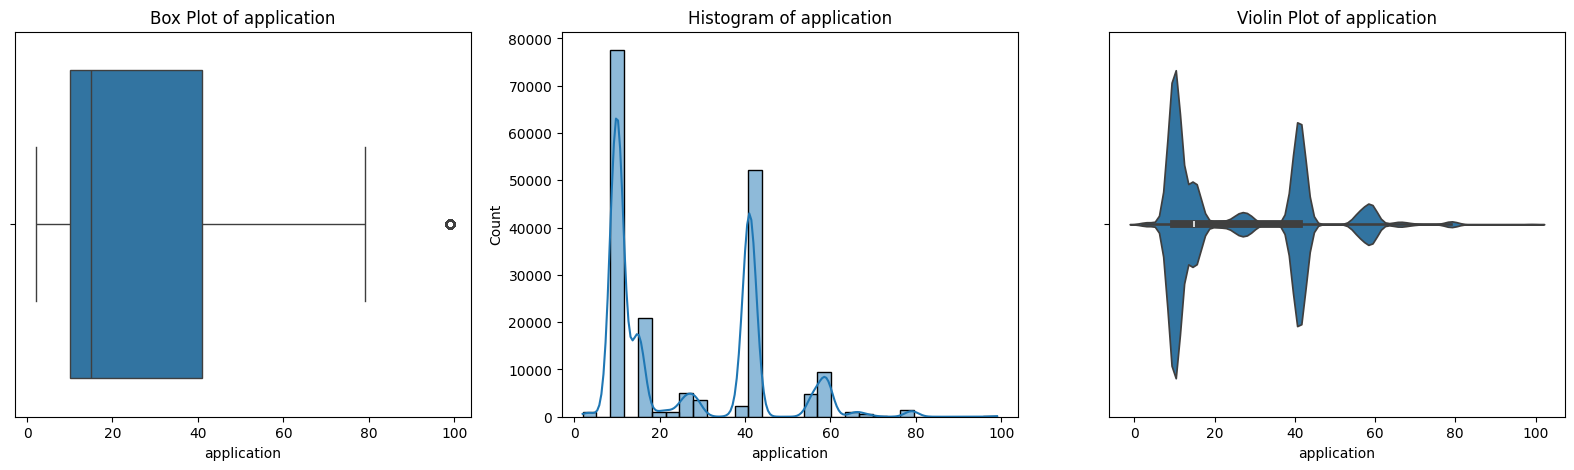

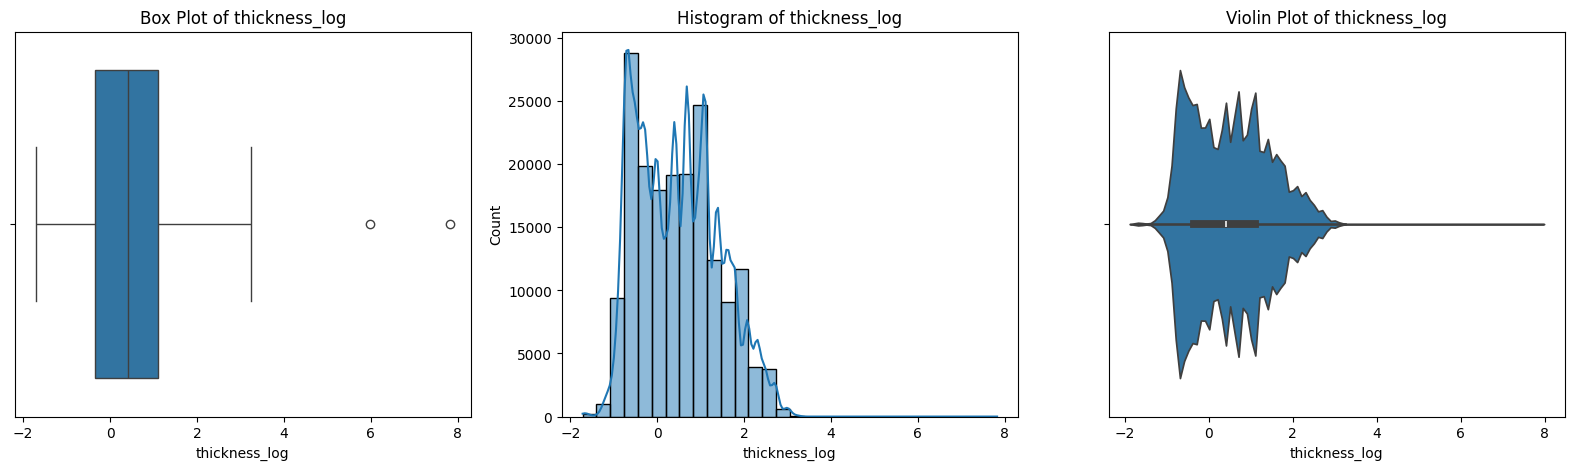

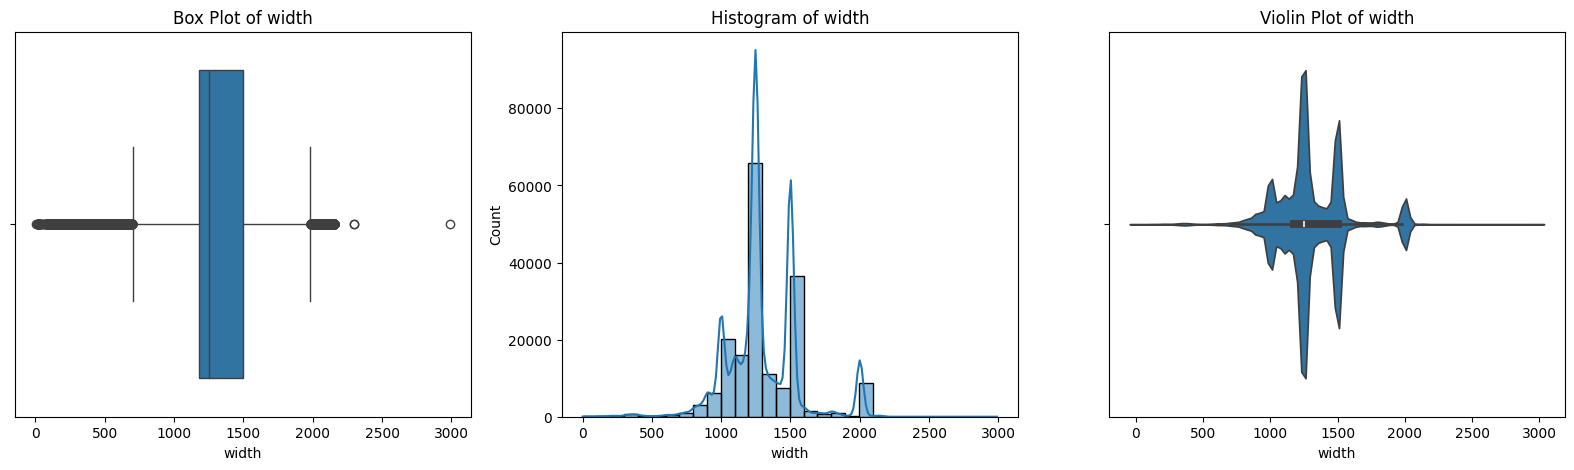

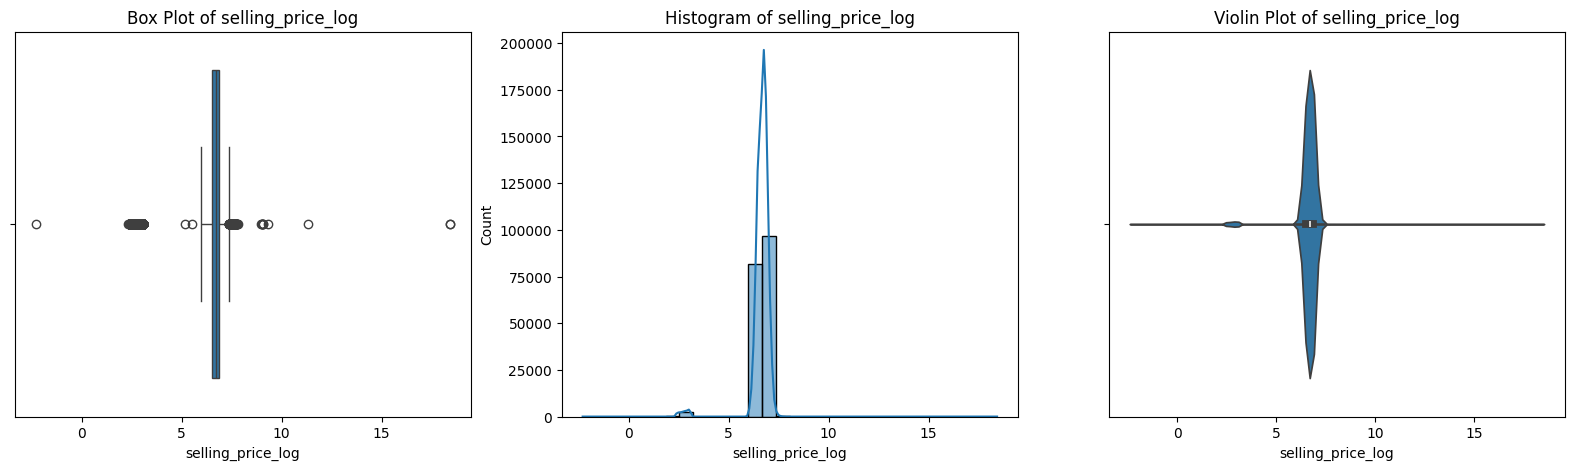

In [39]:
# Box plot for all numerical columns to detect outliers
for i in ['quantity tons_log', 'customer', 'country', 'item type', 'application', 'thickness_log', 'width', 'selling_price_log']:
  plot(df1, i)

In [40]:
df1.describe().T

,count,mean,min,25%,50%,75%,max,std
item_date,181667,2020-11-26 22:56:12.883352832,2020-07-02 00:00:00,2020-09-29 00:00:00,2020-11-30 00:00:00,2021-02-03 00:00:00,2021-04-01 00:00:00,NaN
customer,181667.0,30512215.589904,12458.0,30196884.0,30205242.0,30280416.0,2147483647.0,24334150.416962
country,181667.0,44.890751,25.0,26.0,30.0,78.0,113.0,24.403037
application,181667.0,25.614448,2.0,10.0,15.0,41.0,99.0,17.753182
width,181667.0,1295.285308,1.0,1180.0,1250.0,1500.0,2990.0,261.63541
product_ref,181667.0,473973462.089174,611728.0,611993.0,640665.0,1332077137.0,1722207579.0,717512632.039963
delivery date,181667,2021-01-25 22:43:35.259788544,2019-04-01 00:00:00,2020-11-01 00:00:00,2021-01-01 00:00:00,2021-04-01 00:00:00,2022-01-01 00:00:00,NaN
delivery_date_diff,181667.0,68.080081,1.0,37.0,66.0,97.0,448.0,37.350754
quantity tons_log,181667.0,3.392099,-11.512925,2.39526,3.413291,4.207074,20.723266,1.444865
thickness_log,181667.0,0.480388,-1.714798,-0.356675,0.405465,1.098612,7.824046,0.933777


In [41]:
df2 = df1.copy()
df2

,id,item_date,customer,country,status,item type,application,width,material_ref,product_ref,delivery date,delivery_date_diff,quantity tons_log,thickness_log,selling_price_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,30156308.0,28.0,Won,W,10.0,1500.0,DEQ1 S460MC,1670798778,2021-07-01,91.0,3.991779,0.693147,6.749931
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,30202938.0,25.0,Won,W,41.0,1210.0,104991,1668701718,2021-04-01,66.0,6.643822,-0.223144,6.953684
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,30153963.0,30.0,Won,WI,28.0,952.0,S0380700,628377,2021-01-01,66.0,5.956169,-0.967584,6.468211
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,30349574.0,32.0,Won,S,59.0,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,66.0,5.310301,0.832909,6.643790
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,30211560.0,28.0,Won,W,10.0,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,66.0,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,30200854.0,25.0,Won,W,41.0,1220.0,1000777,164141591,2020-07-01,66.0,4.629691,-0.040822,6.381816
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,30200854.0,25.0,Won,W,41.0,1500.0,1000227,164141591,2020-07-01,66.0,5.337954,-0.051293,6.378426
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,30200854.0,25.0,Won,W,41.0,1250.0,1004216,164141591,2020-07-01,66.0,1.443523,-0.342490,6.428105
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,2020-07-02,30200854.0,25.0,Won,W,41.0,1250.0,1001149,164141591,2020-07-01,66.0,3.413291,-0.162519,6.398595


In [45]:
#Finding the IQR
def outlier(df, column):
  percentile25 = df[column].quantile(0.25)
  percentile75 = df[column].quantile(0.75)
  iqr=percentile75 - percentile25

#Finding upper and lower limit
  upper_limit = percentile75 + (1.5 * iqr)
  lower_limit = percentile25 - (1.5 * iqr)
  # Clip the outliers using upper and lower limits
  df[column] = df[column].clip(lower_limit, upper_limit)
outlier(df2, 'quantity tons_log')
outlier(df2, 'thickness_log')
outlier(df2, 'selling_price_log')
outlier(df2, 'width')
df2


,id,item_date,customer,country,status,item type,application,width,material_ref,product_ref,delivery date,delivery_date_diff,quantity tons_log,thickness_log,selling_price_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,30156308.0,28.0,Won,W,10.0,1500.0,DEQ1 S460MC,1670798778,2021-07-01,91.0,3.991779,0.693147,6.749931
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,30202938.0,25.0,Won,W,41.0,1210.0,104991,1668701718,2021-04-01,66.0,6.643822,-0.223144,6.953684
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,30153963.0,30.0,Won,WI,28.0,952.0,S0380700,628377,2021-01-01,66.0,5.956169,-0.967584,6.468211
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,30349574.0,32.0,Won,S,59.0,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,66.0,5.310301,0.832909,6.643790
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,30211560.0,28.0,Won,W,10.0,1980.0,2_S275JR+AR-CL1,640665,2021-03-01,66.0,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,30200854.0,25.0,Won,W,41.0,1220.0,1000777,164141591,2020-07-01,66.0,4.629691,-0.040822,6.381816
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,30200854.0,25.0,Won,W,41.0,1500.0,1000227,164141591,2020-07-01,66.0,5.337954,-0.051293,6.378426
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,30200854.0,25.0,Won,W,41.0,1250.0,1004216,164141591,2020-07-01,66.0,1.443523,-0.342490,6.428105
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,2020-07-02,30200854.0,25.0,Won,W,41.0,1250.0,1001149,164141591,2020-07-01,66.0,3.413291,-0.162519,6.398595


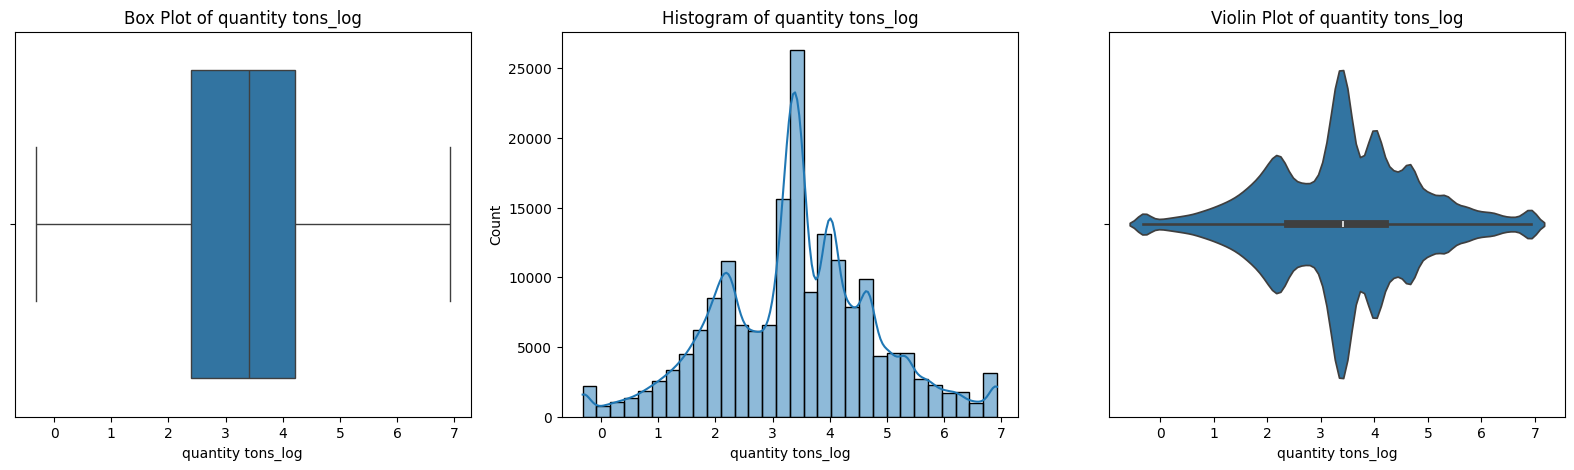

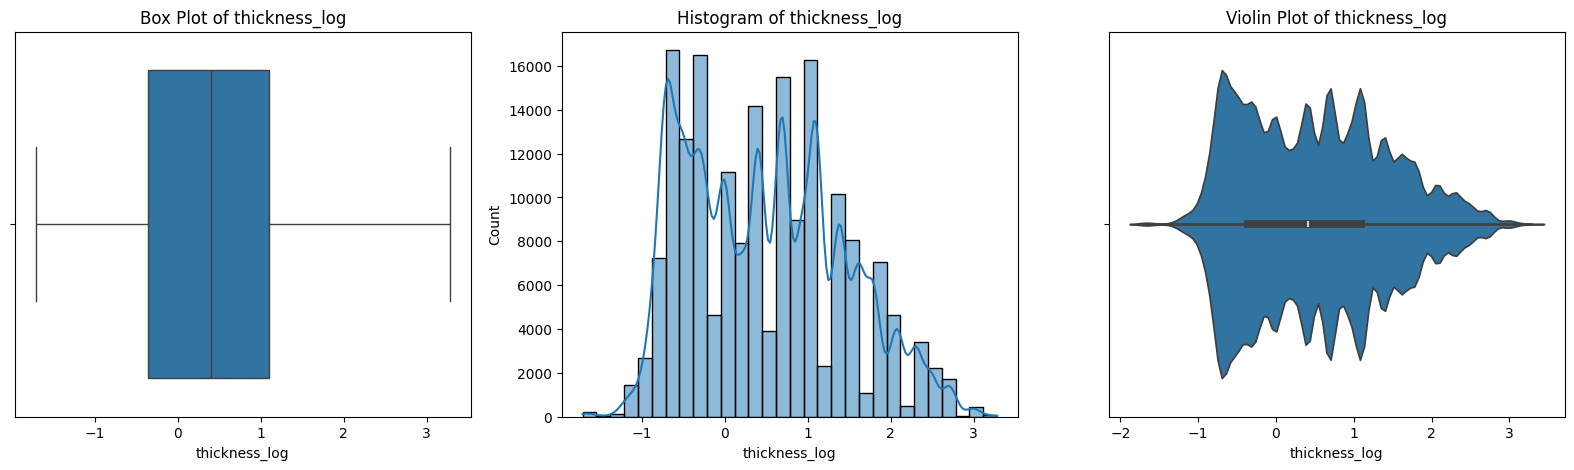

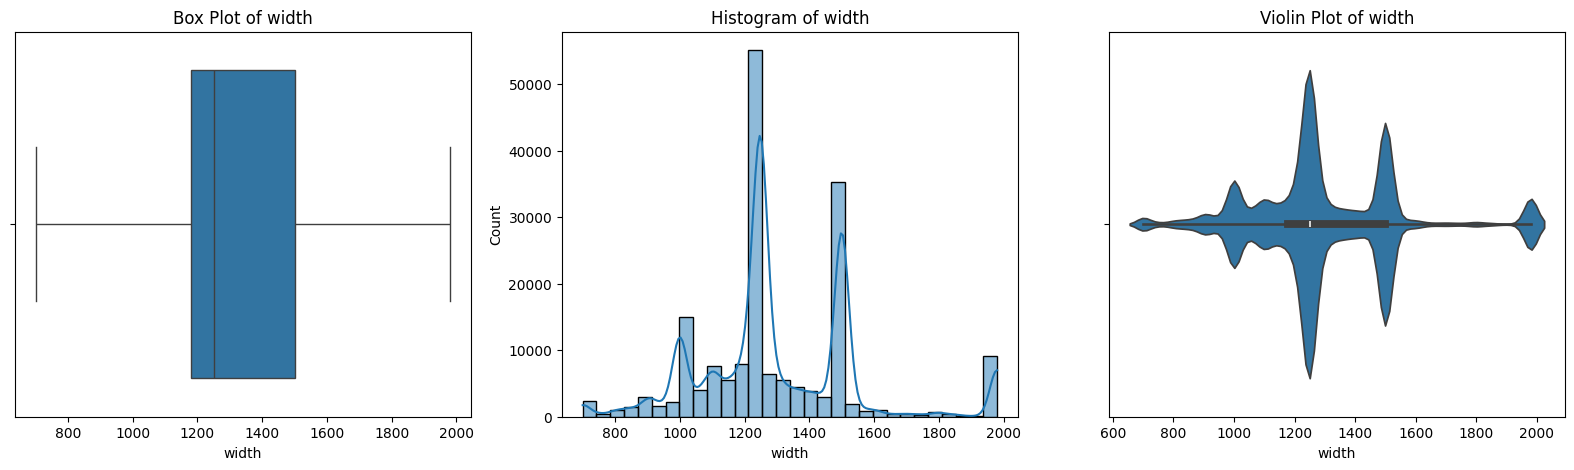

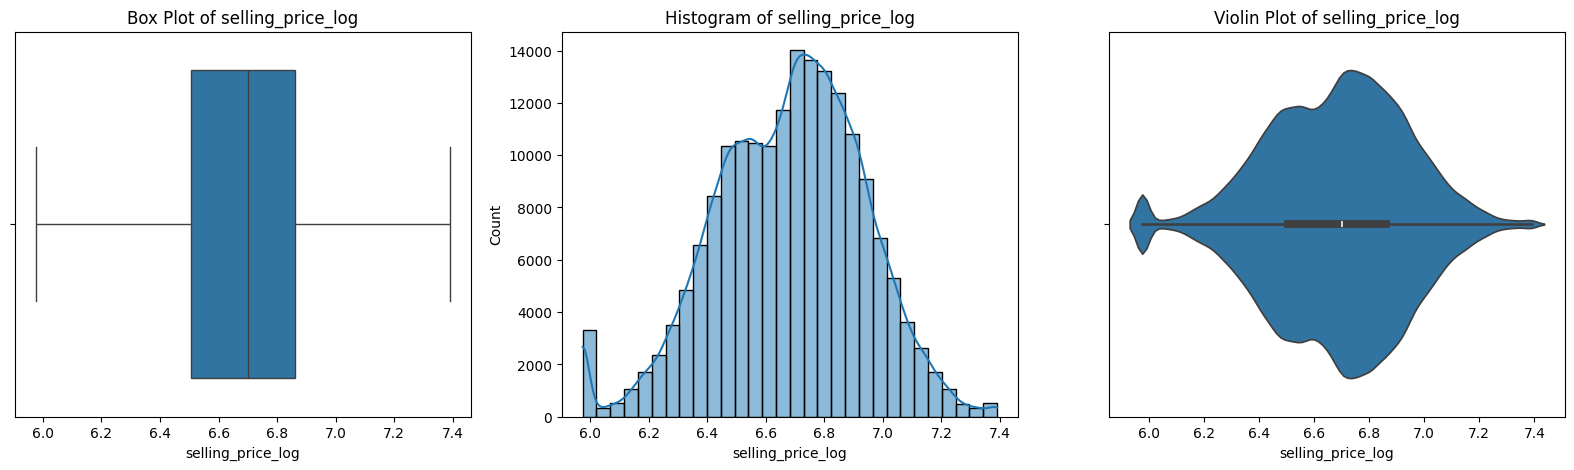

In [46]:
for i in ['quantity tons_log', 'thickness_log', 'width', 'selling_price_log']:
    plot(df2, i)

<Axes: >

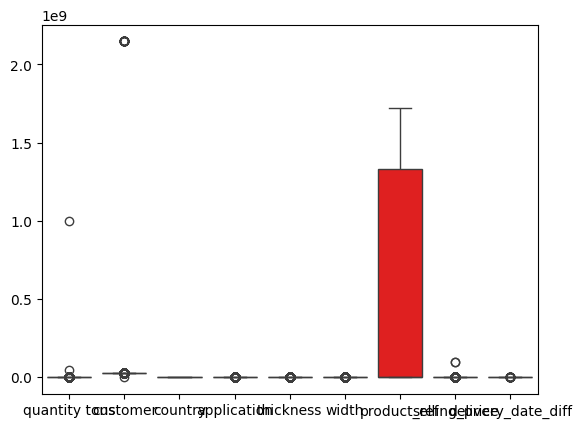

In [47]:
# boxplot to know the Outliers
sns.boxplot(data = df, color='red')

In [48]:
df2.describe().T

,count,mean,min,25%,50%,75%,max,std
item_date,181667,2020-11-26 22:56:12.883352832,2020-07-02 00:00:00,2020-09-29 00:00:00,2020-11-30 00:00:00,2021-02-03 00:00:00,2021-04-01 00:00:00,NaN
customer,181667.0,30512215.589904,12458.0,30196884.0,30205242.0,30280416.0,2147483647.0,24334150.416962
country,181667.0,44.890751,25.0,26.0,30.0,78.0,113.0,24.403037
application,181667.0,25.614448,2.0,10.0,15.0,41.0,99.0,17.753182
width,181667.0,1297.044225,700.0,1180.0,1250.0,1500.0,1980.0,248.965355
product_ref,181667.0,473973462.089174,611728.0,611993.0,640665.0,1332077137.0,1722207579.0,717512632.039963
delivery date,181667,2021-01-25 22:43:35.259788544,2019-04-01 00:00:00,2020-11-01 00:00:00,2021-01-01 00:00:00,2021-04-01 00:00:00,2022-01-01 00:00:00,NaN
delivery_date_diff,181667.0,68.080081,1.0,37.0,66.0,97.0,448.0,37.350754
quantity tons_log,181667.0,3.392937,-0.322461,2.39526,3.413291,4.207074,6.924795,1.394643
thickness_log,181667.0,0.480348,-1.714798,-0.356675,0.405465,1.098612,3.281543,0.933574


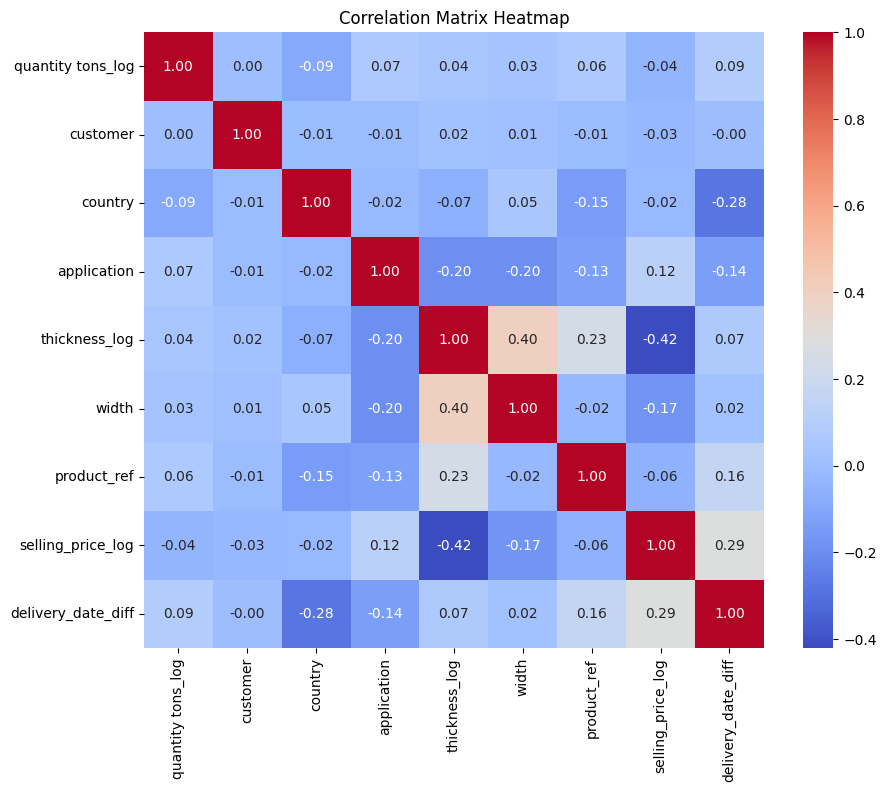

In [49]:
# Create a heatmap for the correlation matrix
correlation_matrix =df2[['quantity tons_log', 'customer', 'country', 'application', 'thickness_log', 'width', 'product_ref', 'selling_price_log','delivery_date_diff']].corr()
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [50]:
df3=df2.copy()
df3

,id,item_date,customer,country,status,item type,application,width,material_ref,product_ref,delivery date,delivery_date_diff,quantity tons_log,thickness_log,selling_price_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,30156308.0,28.0,Won,W,10.0,1500.0,DEQ1 S460MC,1670798778,2021-07-01,91.0,3.991779,0.693147,6.749931
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,30202938.0,25.0,Won,W,41.0,1210.0,104991,1668701718,2021-04-01,66.0,6.643822,-0.223144,6.953684
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,30153963.0,30.0,Won,WI,28.0,952.0,S0380700,628377,2021-01-01,66.0,5.956169,-0.967584,6.468211
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,30349574.0,32.0,Won,S,59.0,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,66.0,5.310301,0.832909,6.643790
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,30211560.0,28.0,Won,W,10.0,1980.0,2_S275JR+AR-CL1,640665,2021-03-01,66.0,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,30200854.0,25.0,Won,W,41.0,1220.0,1000777,164141591,2020-07-01,66.0,4.629691,-0.040822,6.381816
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,30200854.0,25.0,Won,W,41.0,1500.0,1000227,164141591,2020-07-01,66.0,5.337954,-0.051293,6.378426
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,30200854.0,25.0,Won,W,41.0,1250.0,1004216,164141591,2020-07-01,66.0,1.443523,-0.342490,6.428105
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,2020-07-02,30200854.0,25.0,Won,W,41.0,1250.0,1001149,164141591,2020-07-01,66.0,3.413291,-0.162519,6.398595


In [51]:
df3['status'].value_counts()

status
Won                116009
Lost                34436
Not lost for AM     19573
Revised              4276
To be approved       4169
Draft                3140
Offered                53
Offerable              10
Wonderful               1
Name: count, dtype: int64

In [52]:
# Mapping the status to train it in ML

df3["status"]= df3["status"].map({'Won':1, 'Draft':2, 'To be approved':3, 'Lost':0, 'Not lost for AM':4,
                                'Wonderful':5, 'Revised':6, 'Offered':7, 'Offerable':8})
df3['status'].unique()

array([1, 2, 3, 0, 4, 5, 6, 7, 8], dtype=int64)

In [53]:
df3['status'].value_counts()

status
1    116009
0     34436
4     19573
6      4276
3      4169
2      3140
7        53
8        10
5         1
Name: count, dtype: int64

In [54]:
df3['item type'].value_counts()

item type
W         105614
S          69231
PL          5660
Others       610
WI           524
IPL           27
SLAWR          1
Name: count, dtype: int64

In [55]:
# Encoding the status to use it in ML
from sklearn.preprocessing import OrdinalEncoder
df3['item type'] = OrdinalEncoder().fit_transform(df3[['item type']])
df3['item type'].unique()

array([5., 6., 3., 1., 2., 0., 4.])

In [56]:
df3['item type'].value_counts()

item type
5.0    105614
3.0     69231
2.0      5660
1.0       610
6.0       524
0.0        27
4.0         1
Name: count, dtype: int64

In [56]:
!pip install xgboost


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.2/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB 3.2 MB/s eta 0:00:40
   ---------------------------------------- 0.4/124.9 MB 2.5 MB/s eta 0:00:50
   ---------------------------------------- 0.5/124.9 MB 2.1 MB/s eta 0:01:01
   ---------------------------------------- 0.7/124.9 MB 2.8 MB/s eta 0:00:45
   ---------------------------------------- 0.9/124.9 MB 2.8 MB/s eta 0:00:45
   ---------------------------------------- 1.3/124.9 MB 3.7 MB/s eta 0:00:34
   ---------------------------------------- 1.5/124.9 MB 3.8 MB/s eta 0:00:33
    --------------------------------------- 2.1/124.9 MB 4.4 MB/s eta 0:00:28
    --------------------------------------- 2.2/124.9 MB 4.6 MB/s eta 0:00:27
    --------------------------------------- 2.7/124.9 MB 5.0 MB/s eta 0:00:25
    --------------------------------------- 2.7/124.9 MB 5.0 MB/s eta 0:00:25

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor


from sklearn import metrics
import numpy as np

In [58]:
df4=df3.copy()
df4

,id,item_date,customer,country,status,item type,application,width,material_ref,product_ref,delivery date,delivery_date_diff,quantity tons_log,thickness_log,selling_price_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,30156308.0,28.0,1,5.0,10.0,1500.0,DEQ1 S460MC,1670798778,2021-07-01,91.0,3.991779,0.693147,6.749931
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,30202938.0,25.0,1,5.0,41.0,1210.0,104991,1668701718,2021-04-01,66.0,6.643822,-0.223144,6.953684
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,30153963.0,30.0,1,6.0,28.0,952.0,S0380700,628377,2021-01-01,66.0,5.956169,-0.967584,6.468211
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,30349574.0,32.0,1,3.0,59.0,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,66.0,5.310301,0.832909,6.643790
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,30211560.0,28.0,1,5.0,10.0,1980.0,2_S275JR+AR-CL1,640665,2021-03-01,66.0,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,30200854.0,25.0,1,5.0,41.0,1220.0,1000777,164141591,2020-07-01,66.0,4.629691,-0.040822,6.381816
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,30200854.0,25.0,1,5.0,41.0,1500.0,1000227,164141591,2020-07-01,66.0,5.337954,-0.051293,6.378426
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,30200854.0,25.0,1,5.0,41.0,1250.0,1004216,164141591,2020-07-01,66.0,1.443523,-0.342490,6.428105
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,2020-07-02,30200854.0,25.0,1,5.0,41.0,1250.0,1001149,164141591,2020-07-01,66.0,3.413291,-0.162519,6.398595


In [59]:
# Drop the unwanted columns to train the model
df4.drop(columns=['id','item_date','delivery date','material_ref'], inplace=True)
df4

,customer,country,status,item type,application,width,product_ref,delivery_date_diff,quantity tons_log,thickness_log,selling_price_log
0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,91.0,3.991779,0.693147,6.749931
1,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,66.0,6.643822,-0.223144,6.953684
2,30153963.0,30.0,1,6.0,28.0,952.0,628377,66.0,5.956169,-0.967584,6.468211
3,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,66.0,5.310301,0.832909,6.643790
4,30211560.0,28.0,1,5.0,10.0,1980.0,640665,66.0,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...
181668,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,66.0,4.629691,-0.040822,6.381816
181669,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,66.0,5.337954,-0.051293,6.378426
181670,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,66.0,1.443523,-0.342490,6.428105
181671,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,66.0,3.413291,-0.162519,6.398595


In [60]:
def Best_ML_algorithm(df, algorithms):
    x = df4.drop(columns=['selling_price_log'], axis=1) # choosing the features
    y = df4['selling_price_log'] # Choosing the Traget

    # Split the data for train and test the model
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

    results = {}

    # choosing the best algorith which suits for data
    for algorithm in algorithms:
        model = algorithm().fit(x_train, y_train)
        y_pred = model.predict(x_test)
        MAE = metrics.mean_absolute_error(y_test, y_pred)
        MSE = metrics.mean_squared_error(y_test, y_pred)
        RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
        r2 = metrics.r2_score(y_test, y_pred)

        results[algorithm.__name__] = {
            'Mean Absolute Error': MAE,
            'Mean Squared Error': MSE,
            'Root Mean Squared Error': RMSE,
            'R² score': r2
        }

        print(f"**Evaluation Metrics for {algorithm.__name__}:**")
        print(f"Mean Absolute Error: {MAE}")
        print(f"Mean Squared Error: {MSE}")
        print(f"Root Mean Squared Error: {RMSE}")
        print(f"R² score: {r2}")
        print()

    best_algorithm = max(results.items(), key=lambda item: item[1]['R² score'])[0]

    return best_algorithm, results

#algorithm used for checking
algorithms = [LinearRegression, DecisionTreeRegressor, ExtraTreesRegressor, RandomForestRegressor,
        GradientBoostingRegressor, XGBRegressor]

Best_algorithm, results = Best_ML_algorithm(df, algorithms)

results_df = pd.DataFrame(results).transpose()

print("**Evaluation Metrics for All Algorithms:**")
print(results_df.to_string())

print("**Best Algorithm:**", Best_algorithm)

**Evaluation Metrics for LinearRegression:**
Mean Absolute Error: 0.16388827031939315
Mean Squared Error: 0.04594010250739099
Root Mean Squared Error: 0.2143364236600746
R² score: 0.2987066371300079

**Evaluation Metrics for DecisionTreeRegressor:**
Mean Absolute Error: 0.05407443491313575
Mean Squared Error: 0.01001450347715195
Root Mean Squared Error: 0.10007249111095391
R² score: 0.847124746405709

**Evaluation Metrics for ExtraTreesRegressor:**
Mean Absolute Error: 0.04656409195826962
Mean Squared Error: 0.005780080575643699
Root Mean Squared Error: 0.07602684115260674
R² score: 0.9117648432782547

**Evaluation Metrics for RandomForestRegressor:**
Mean Absolute Error: 0.045895549845131486
Mean Squared Error: 0.005477000420158472
Root Mean Squared Error: 0.07400675928696292
R² score: 0.9163914786111906

**Evaluation Metrics for GradientBoostingRegressor:**
Mean Absolute Error: 0.11744081452228407
Mean Squared Error: 0.021241268551548356
Root Mean Squared Error: 0.14574384567297638
R

Getting the result as best algorithm is RandomForestREgressor so further using hyperparameter tuning selecting the best parameteres to train the model

GridSearchCV tests all possible combinations but can be slow.

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

x = df4.drop(columns=['selling_price_log'], axis=1) # choosing the features
y = df4['selling_price_log'] # Choosing the Traget

# Split the data for train and test the model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100],                # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'], # Different feature selection strategies
    'max_depth': [10, 20],                    # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],          # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],            # Minimum number of samples required to be a leaf node
}

# Define the model
model = RandomForestRegressor()

# Create the grid search object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='r2', verbose=2, n_jobs=4)

# Fit the model to the training data
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Get the best estimator (model with best hyperparameters)
best_model = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [62]:
# By using the parameters getting from gridsearchCV we train a model by the params

x = df4.drop(columns=['selling_price_log'], axis=1) # choosing the features
y = df4['selling_price_log'] # Choosing the Traget

# Split the data for train and test the model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

model=RandomForestRegressor(n_estimators=100,random_state=42,max_depth=20,max_features= None ,min_samples_leaf=1,min_samples_split=2)
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {MAE}")
print(f"Mean Squared Error: {MSE}")
print(f"Root Mean Squared Error: {RMSE}")
print(f"R² score: {r2}")

Mean Absolute Error: 0.048462301872216666
Mean Squared Error: 0.0057082803744815626
Root Mean Squared Error: 0.07555316257101063
R² score: 0.9128609010095067


In [63]:
df4.head()

,customer,country,status,item type,application,width,product_ref,delivery_date_diff,quantity tons_log,thickness_log,selling_price_log
0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,91.0,3.991779,0.693147,6.749931
1,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,66.0,6.643822,-0.223144,6.953684
2,30153963.0,30.0,1,6.0,28.0,952.0,628377,66.0,5.956169,-0.967584,6.468211
3,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,66.0,5.310301,0.832909,6.643790
4,30211560.0,28.0,1,5.0,10.0,1980.0,640665,66.0,6.666354,1.386294,6.357842


In [64]:
# Checking the accuracy manually
user_data = np.array([[30156308,28,1,5,10,1500,1670798778,91.0,3.991779,0.693147]])

y_pred = model.predict(user_data)
y_pred[0]

6.6416150689459705

In [65]:
np.exp(y_pred[0])

766.3316725765383

In [66]:
import pickle

In [67]:
# store it in a pickle file
with open('regression_model.pkl', 'wb') as f:

# Step 2: Use pickle.dump to serialize the model and write it to the file
  pickle.dump(model, f)


In [68]:
with open(r'C:\Users\nawas\Desktop\project 4\regression_model.pkl', 'rb') as f:
    model = pickle.load(f)

y_pred = model.predict(np.array([[30156308,28,1,5,10,1500,1670798778,91.0,3.991779,0.693147]]))
np.exp(y_pred[0])

766.3316725765383

In [69]:
# Taken only won and loss from the status
df_s = df4.copy()

# filter the status column values only 1 & 0 rows in a new dataframe ['Won':1 & 'Lost':0]

df_s = df_s[(df_s.status == 1) | (df_s.status == 0)]
df_s

,customer,country,status,item type,application,width,product_ref,delivery_date_diff,quantity tons_log,thickness_log,selling_price_log
0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,91.0,3.991779,0.693147,6.749931
1,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,66.0,6.643822,-0.223144,6.953684
2,30153963.0,30.0,1,6.0,28.0,952.0,628377,66.0,5.956169,-0.967584,6.468211
3,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,66.0,5.310301,0.832909,6.643790
4,30211560.0,28.0,1,5.0,10.0,1980.0,640665,66.0,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...
181668,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,66.0,4.629691,-0.040822,6.381816
181669,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,66.0,5.337954,-0.051293,6.378426
181670,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,66.0,1.443523,-0.342490,6.428105
181671,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,66.0,3.413291,-0.162519,6.398595


In [70]:
x = df_s.drop(columns=['status'], axis=1)
y = df_s['status']

In [71]:
# data is oversampled so using SMOTE we balanced it
from imblearn.over_sampling import SMOTE

smote = SMOTE()  # Create an instance of SMOTE

x_train_smote, y_train_smote = smote.fit_resample(x, y)  # Apply SMOTE

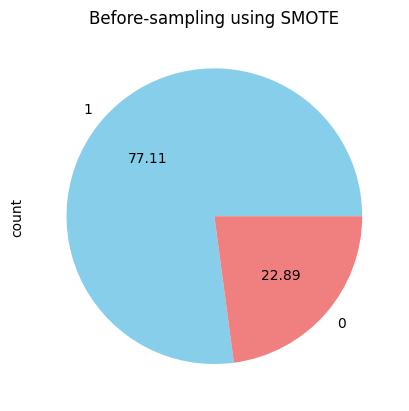

In [72]:
ax = y.value_counts().plot.pie(autopct='%.2f', colors=['skyblue', 'lightcoral'])
_ = ax.set_title("Before-sampling using SMOTE")


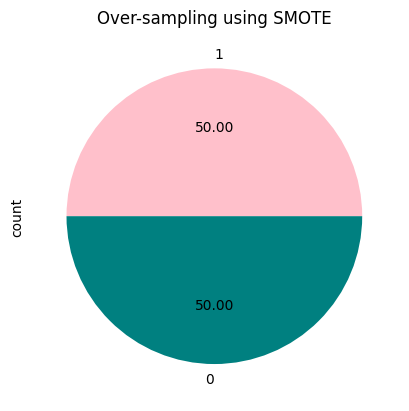

In [73]:
ax = y_train_smote.value_counts().plot.pie(autopct='%.2f', colors=['pink', 'teal'])
_ = ax.set_title("Over-sampling using SMOTE")

In [74]:
y_train_smote.value_counts()

status
1    116009
0    116009
Name: count, dtype: int64

In [75]:
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import pickle

In [76]:
def Best_ML_algorithm(x_train_smote, y_train_smote, algorithms):

    # Split the data for train and test the model
    x_train, x_test, y_train, y_test = train_test_split(x_train_smote, y_train_smote, test_size=0.3, random_state=42)

    results = {}

    # choosing the best algorith which suits for data
    for algorithm in algorithms:
        model = algorithm().fit(x_train, y_train)
        y_pred = model.predict(x_test)
        accuracy = metrics.accuracy_score(y_test, y_pred)
        precision = metrics.precision_score(y_test, y_pred)
        recall = metrics.recall_score(y_test, y_pred)
        f1 = metrics.f1_score(y_test, y_pred)

        results[algorithm.__name__] = {
            'Accuracy score': accuracy,
            'Precision score': precision,
            'Recall score': recall,
            'F1 score': f1
        }

        print(f"**Evaluation Metrics for {algorithm.__name__}:**")
        print(f"Mean Absolute Error: {accuracy}")
        print(f"Mean Squared Error: {precision}")
        print(f"Root Mean Squared Error: {recall}")
        print(f"R² score: {f1}")
        print()

    best_algorithm = max(results.items(), key=lambda item: item[1]['Accuracy score'])[0]

    return best_algorithm, results

#algorithm used for checking
algorithms = [LogisticRegression, DecisionTreeClassifier, ExtraTreesClassifier, AdaBoostClassifier,
    GradientBoostingClassifier, XGBClassifier]

Best_algorithm, results = Best_ML_algorithm(x_train_smote, y_train_smote, algorithms)

results_df = pd.DataFrame(results).transpose()

print("**Evaluation Metrics for All Algorithms:**")
print(results_df.to_string())

print("**Best Algorithm:**", Best_algorithm)

**Evaluation Metrics for LogisticRegression:**
Mean Absolute Error: 0.5420509726173031
Mean Squared Error: 0.5288563721082319
Root Mean Squared Error: 0.7457636887608069
R² score: 0.6188540271666347

**Evaluation Metrics for DecisionTreeClassifier:**
Mean Absolute Error: 0.9544723156049766
Mean Squared Error: 0.9550321817184749
Root Mean Squared Error: 0.9535734870317003
R² score: 0.9543022769550233

**Evaluation Metrics for ExtraTreesClassifier:**
Mean Absolute Error: 0.9768123437634687
Mean Squared Error: 0.9879365266635205
Root Mean Squared Error: 0.9652737752161383
R² score: 0.9764736750043729

**Evaluation Metrics for AdaBoostClassifier:**
Mean Absolute Error: 0.7637703646237394
Mean Squared Error: 0.7704340097763295
Root Mean Squared Error: 0.7494524495677234
R² score: 0.7597984077130961

**Evaluation Metrics for GradientBoostingClassifier:**
Mean Absolute Error: 0.798092118495532
Mean Squared Error: 0.8163265306122449
Root Mean Squared Error: 0.7677233429394813
R² score: 0.79127

Getting the result as best Algorithm is ExtraTeesClassifier so I am choose the parameter using GridsearchCV

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Split the data for train and test the model
x_train, x_test, y_train, y_test = train_test_split(x_train_smote, y_train_smote, test_size=0.3, random_state=42)

# Define the parameter grid for ExtraTreesClassifier
param_grid = {
    'n_estimators': [50, 100],                # Number of trees in the forest
    'max_depth': [10, 20, 25],                # Maximum depth of each tree
    'min_samples_split': [2, 5],              # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2,],              # Minimum number of samples required to be a leaf node
}

# Set up the GridSearchCV
grid_search = GridSearchCV(ExtraTreesClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the model to the training data
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Get the best estimator (model with best hyperparameters)
best_model = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

# Split the data for train and test the model
x_train, x_test, y_train, y_test = train_test_split(x_train_smote, y_train_smote, test_size=0.3, random_state=42)

model = ExtraTreesClassifier(n_estimators=100,random_state=42,max_depth=25, min_samples_leaf=1, min_samples_split=2)
model.fit(x_train,y_train)

y_pred=model.predict(x_test) # Test a data

accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

print(f"Mean Absolute Error: {accuracy}")
print(f"Mean Squared Error: {precision}")
print(f"Root Mean Squared Error: {recall}")
print(f"R² score: {f1}")

Mean Absolute Error: 0.9649168175157314
Mean Squared Error: 0.9889946640795537
Root Mean Squared Error: 0.9400864553314121
R² score: 0.9639205720702086


In [80]:
df_s.head()

,customer,country,status,item type,application,width,product_ref,delivery_date_diff,quantity tons_log,thickness_log,selling_price_log
0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,91.0,3.991779,0.693147,6.749931
1,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,66.0,6.643822,-0.223144,6.953684
2,30153963.0,30.0,1,6.0,28.0,952.0,628377,66.0,5.956169,-0.967584,6.468211
3,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,66.0,5.310301,0.832909,6.643790
4,30211560.0,28.0,1,5.0,10.0,1980.0,640665,66.0,6.666354,1.386294,6.357842


In [81]:
# Checking the accuracy manually
user_data = np.array([[30156308,28,1,5,10,1500,1670798778,91.0,3.991779,6.749931]])

y_pred = model.predict(user_data)
if y_pred[0]==1:
    print("Won")
else:
    print("Loss")

Won


In [82]:
import pickle

In [83]:
# store it in a pickle file
with open('classification_model.pkl', 'wb') as f:

# Step 2: Use pickle.dump to serialize the model and write it to the file
  pickle.dump(model, f)


In [84]:
with open(r'C:\Users\nawas\Desktop\project 4\classification_model.pkl', 'rb') as f:
    model = pickle.load(f)

y_pred = model.predict(np.array([[30156308,28,1,5,10,1500,1670798778,91.0,3.991779,6.749931]]))
if y_pred[0]==1:
    print("Won")
else:
    print("Loss")

Won
